### Echo-RNN
The network remembers the input data and then echoes it after a few time-steps.  
This is part 2, building RNN using TensorFlow API : [Ref. blog](https://medium.com/@erikhallstrm/tensorflow-rnn-api-2bb31821b185)  

#### import

In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#### network constant

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length


#### data generation  
method to generate seq. data: random binary vector


In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

### Building the Network Graph
#### Placeholders

In [4]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

#### Variables
Weights and biases variabls are not required explicitly as TensorFlow RNN has internal wights and biases handling

In [5]:
#W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
#b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

#### Unpacking and split input seriess into batch

In [6]:
inputs_series = tf.split(batchX_placeholder, truncated_backprop_length, 1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

#### Forward Pass

In [7]:
cell = tf.nn.rnn_cell.BasicRNNCell(state_size)
states_series, current_state = tf.nn.static_rnn(cell, inputs_series, init_state)

#### Calculating loss
Softmax layer

In [8]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

#### Visualizing training

In [9]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

#### Run the network

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.757551
Step 100 Loss 0.0236665
Step 200 Loss 0.00892732
Step 300 Loss 0.00521044
Step 400 Loss 0.00487733
Step 500 Loss 0.00344127
Step 600 Loss 0.00174602
New data, epoch 1
Step 0 Loss 0.188789
Step 100 Loss 0.00162958
Step 200 Loss 0.000892087
Step 300 Loss 0.00106013
Step 400 Loss 0.000876436
Step 500 Loss 0.00116724
Step 600 Loss 0.000658219
New data, epoch 2
Step 0 Loss 0.140134
Step 100 Loss 0.000579069
Step 200 Loss 0.000543609
Step 300 Loss 0.000748712
Step 400 Loss 0.00059544
Step 500 Loss 0.000485875
Step 600 Loss 0.000450841
New data, epoch 3
Step 0 Loss 0.168731
Step 100 Loss 0.000437914
Step 200 Loss 0.000526885
Step 300 Loss 0.000470899
Step 400 Loss 0.000325454
Step 500 Loss 0.000453255
Step 600 Loss 0.000322874
New data, epoch 4
Step 0 Loss 0.134633
Step 100 Loss 0.000309003
Step 200 Loss 0.000300955
Step 300 Loss 0.000277527
Step 400 Loss 0.000246871
Step 500 Loss 0.000494945
Step 600 Loss 0.00027392
New data, epoch 5
Step 0 Loss 0.18582

Step 100 Loss 3.34771e-05
Step 200 Loss 3.89028e-05
Step 300 Loss 3.60518e-05
Step 400 Loss 3.27033e-05
Step 500 Loss 3.2522e-05
Step 600 Loss 3.07452e-05
New data, epoch 43
Step 0 Loss 0.194135
Step 100 Loss 2.67351e-05
Step 200 Loss 3.48928e-05
Step 300 Loss 3.81018e-05
Step 400 Loss 3.07134e-05
Step 500 Loss 3.56787e-05
Step 600 Loss 2.92623e-05
New data, epoch 44
Step 0 Loss 0.204735
Step 100 Loss 3.47897e-05
Step 200 Loss 4.1533e-05
Step 300 Loss 4.31199e-05
Step 400 Loss 3.63848e-05
Step 500 Loss 4.20836e-05
Step 600 Loss 3.37521e-05
New data, epoch 45
Step 0 Loss 0.233072
Step 100 Loss 4.06189e-05
Step 200 Loss 3.66788e-05
Step 300 Loss 4.96079e-05
Step 400 Loss 4.68067e-05
Step 500 Loss 3.71895e-05
Step 600 Loss 4.39373e-05
New data, epoch 46
Step 0 Loss 0.0905775
Step 100 Loss 4.94134e-05
Step 200 Loss 3.8682e-05
Step 300 Loss 3.96248e-05
Step 400 Loss 4.63106e-05
Step 500 Loss 4.46954e-05
Step 600 Loss 3.63056e-05
New data, epoch 47
Step 0 Loss 0.132921
Step 100 Loss 4.19683e

Step 100 Loss 1.94384e-05
Step 200 Loss 1.73358e-05
Step 300 Loss 1.78158e-05
Step 400 Loss 1.85278e-05
Step 500 Loss 2.77932e-05
Step 600 Loss 1.65554e-05
New data, epoch 85
Step 0 Loss 0.2322
Step 100 Loss 1.69035e-05
Step 200 Loss 1.71037e-05
Step 300 Loss 1.67732e-05
Step 400 Loss 2.17369e-05
Step 500 Loss 1.80511e-05
Step 600 Loss 1.55032e-05
New data, epoch 86
Step 0 Loss 0.163649
Step 100 Loss 1.37517e-05
Step 200 Loss 1.85963e-05
Step 300 Loss 1.64489e-05
Step 400 Loss 2.04096e-05
Step 500 Loss 1.44907e-05
Step 600 Loss 1.60135e-05
New data, epoch 87
Step 0 Loss 0.136781
Step 100 Loss 1.61168e-05
Step 200 Loss 2.18273e-05
Step 300 Loss 2.65965e-05
Step 400 Loss 2.06402e-05
Step 500 Loss 1.89473e-05
Step 600 Loss 2.0783e-05
New data, epoch 88
Step 0 Loss 0.120553
Step 100 Loss 2.71739e-05
Step 200 Loss 1.74184e-05
Step 300 Loss 1.56718e-05
Step 400 Loss 2.30863e-05
Step 500 Loss 2.37693e-05
Step 600 Loss 1.89425e-05
New data, epoch 89
Step 0 Loss 0.194988
Step 100 Loss 1.72246e-

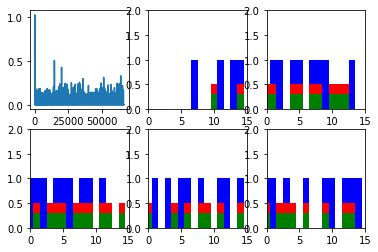

In [10]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()